## <div align="center"> IS411 Data Modeling </div>
## <div align="center"> Analisis Segmentasi Pelanggan berdasarkan Pendapatan dan Pengeluaran Menggunakan Algoritma Clustering K-Means </div>
#### <div align="center"> Kelompok 3 - Kelas E</div>
---


---

### Tugas Akhir 
### Nama Anggota Kelompok 3

1. Chyntia Priseillia (00000070303)
2. Felix Samuel Leo (00000070094)
3. Nelson Saputra (00000069095)
2. Shyfa Ariesta Rustian (00000071428)
2. Tasya Chairunisa (00000071782)

---


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn_extra.cluster import KMedoids
from sklearn.preprocessing import MinMaxScaler
%matplotlib inline

sns.set_style("white")
sns.set_theme()

import warnings
warnings.filterwarnings("ignore")

### Read Dataset

In [36]:
cust = pd.read_csv("customer_data.csv")
cust.head()

,name,age,gender,education,income,country,purchase_frequency,spending
0,Teresa Williams MD,42,Female,High School,53936,Slovenia,0.9,13227.120
1,Christine Myers,49,Female,Master,82468,Aruba,0.6,12674.040
2,Dwayne Moreno,55,Male,Bachelor,56941,Cyprus,0.3,5354.115
3,Amy Norton,24,Female,Bachelor,60651,Palau,0.2,2606.510
4,Tonya Adams,64,Male,Master,81884,Zambia,0.9,18984.780


### EDA

In [3]:
cust.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   name                1000 non-null   object 
 1   age                 1000 non-null   int64  
 2   gender              1000 non-null   object 
 3   education           1000 non-null   object 
 4   income              1000 non-null   int64  
 5   country             1000 non-null   object 
 6   purchase_frequency  1000 non-null   float64
 7   spending            1000 non-null   float64
dtypes: float64(2), int64(2), object(4)
memory usage: 62.6+ KB


In [4]:
cust.describe()

,age,income,purchase_frequency,spending
count,1000.000000,1000.000000,1000.000000,1000.000000
mean,41.754000,59277.852000,0.554600,9613.296835
std,13.778582,23258.377128,0.284675,5484.707210
min,18.000000,20031.000000,0.100000,611.985000
25%,30.000000,38825.500000,0.300000,5020.425000
50%,42.000000,58972.000000,0.600000,9430.395000
75%,54.000000,79114.000000,0.800000,13645.507500
max,65.000000,99780.000000,1.000000,25546.500000


In [5]:
cust.dtypes

name                   object
age                     int64
gender                 object
education              object
income                  int64
country                object
purchase_frequency    float64
spending              float64
dtype: object

### Data Preparation

#### Cek data yang Null

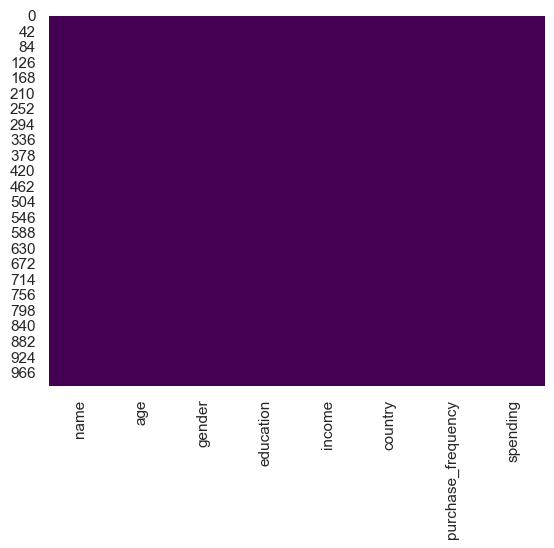

In [6]:
sns.heatmap(cust.isnull(), cbar=False, cmap='viridis')
plt.show()

In [7]:
cust.isnull().any().any()

False

In [8]:
cust.isna().sum()

name                  0
age                   0
gender                0
education             0
income                0
country               0
purchase_frequency    0
spending              0
dtype: int64

#### Duplicated Data

In [9]:
cust.duplicated().sum()

0

#### Drop kolom 'name'

In [37]:
cust.drop(['name'], axis=1, inplace=True)
cust.head()

,age,gender,education,income,country,purchase_frequency,spending
0,42,Female,High School,53936,Slovenia,0.9,13227.120
1,49,Female,Master,82468,Aruba,0.6,12674.040
2,55,Male,Bachelor,56941,Cyprus,0.3,5354.115
3,24,Female,Bachelor,60651,Palau,0.2,2606.510
4,64,Male,Master,81884,Zambia,0.9,18984.780


#### Value Data

In [11]:
cust.gender.value_counts()

gender
Male      501
Female    499
Name: count, dtype: int64

In [12]:
cust.education.value_counts()

education
Bachelor       271
PhD            248
High School    245
Master         236
Name: count, dtype: int64

In [13]:
cust.country.value_counts()

country
Congo                12
Palau                11
Slovenia             10
Algeria               9
Ukraine               9
                     ..
Equatorial Guinea     1
Solomon Islands       1
Niger                 1
Botswana              1
Sudan                 1
Name: count, Length: 239, dtype: int64

#### Select Dtypes

In [14]:
num_col = cust.select_dtypes(include=np.number)
num_col

,age,income,purchase_frequency,spending
0,42,53936,0.9,13227.120
1,49,82468,0.6,12674.040
2,55,56941,0.3,5354.115
3,24,60651,0.2,2606.510
4,64,81884,0.9,18984.780
...,...,...,...,...
995,42,98170,0.7,17435.950
996,39,59174,0.9,11662.830
997,50,59808,0.4,7196.160
998,50,58272,0.7,13939.520


#### Cek Outliers

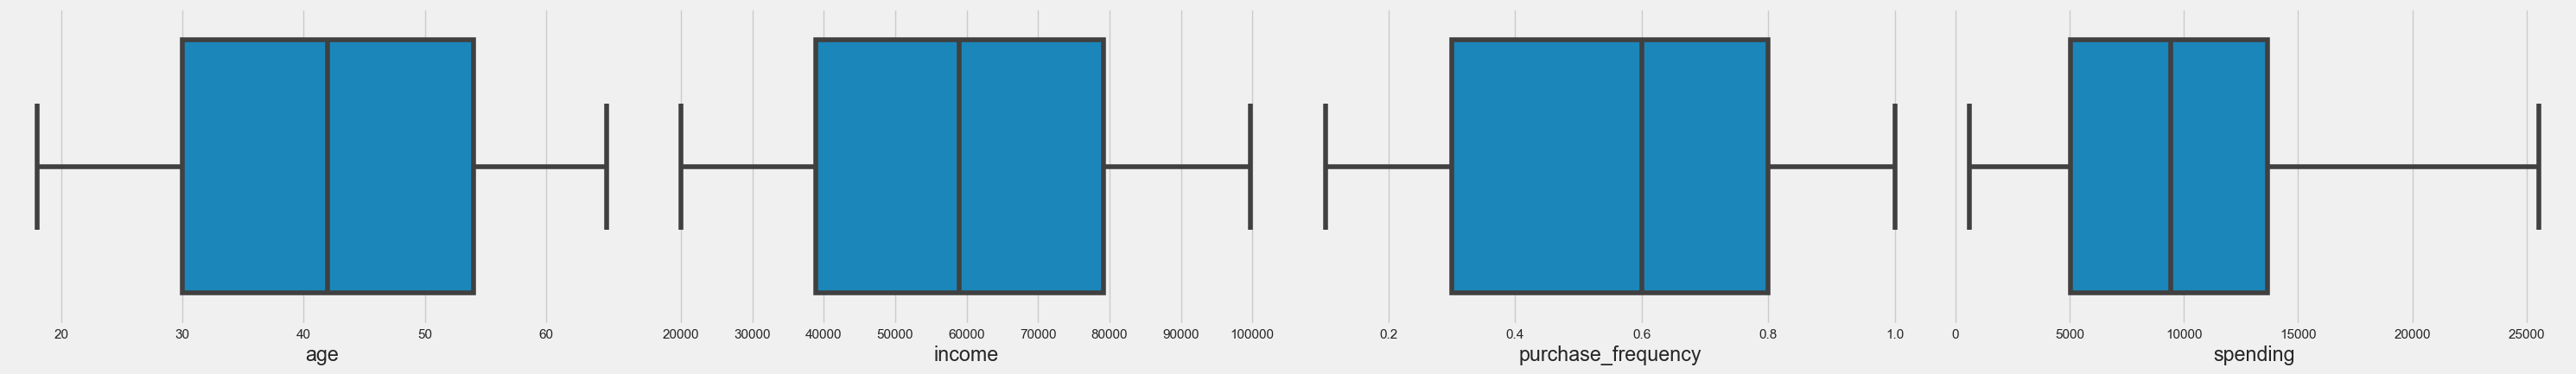

In [15]:
plt.style.use("fivethirtyeight")
plt.figure(figsize=(30,30))
for index,column in enumerate(num_col):
    plt.subplot(7,4,index+1)
    sns.boxplot(data=num_col,x=column)
    
plt.tight_layout(pad = 1.0)

##### Terlihat tidak ada outlier dalam data kolom numerik dari dataset ini

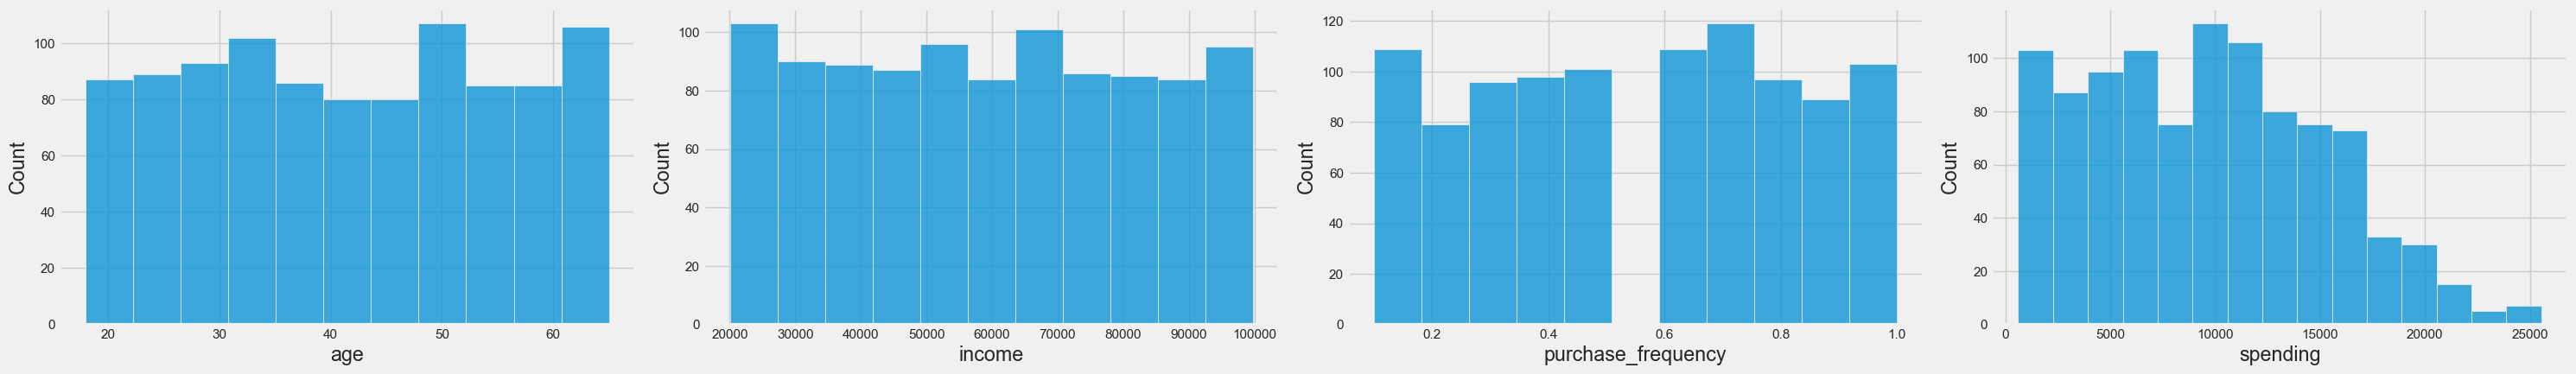

In [16]:
plt.style.use("fivethirtyeight")
plt.figure(figsize=(30,30))
for index,column in enumerate(num_col):
    plt.subplot(7,4,index+1)
    sns.histplot(data=num_col,x=column)
    
plt.tight_layout(pad = 1.0)

#### Visualisasi Data

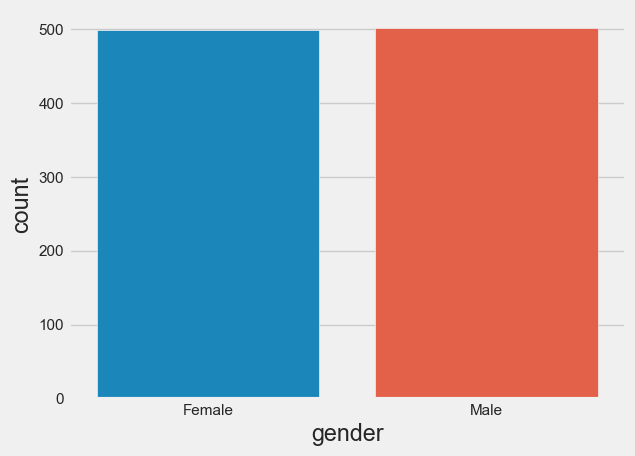

In [17]:
sns.countplot(x='gender', data=cust)
plt.show()

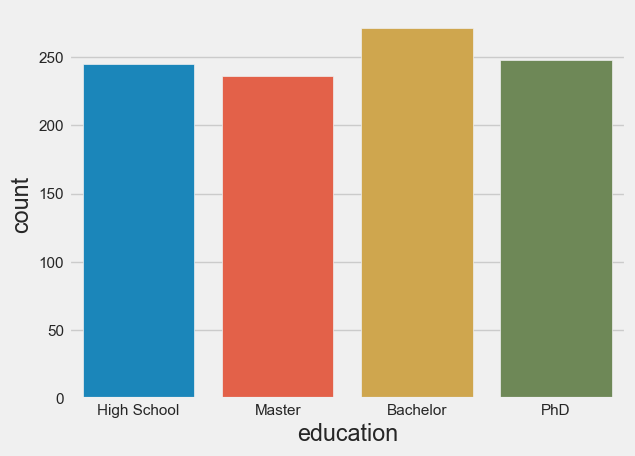

In [18]:
sns.countplot(x='education', data=cust)
plt.show()

Text(0.5, 1.0, 'Distribusi Umur Customer')

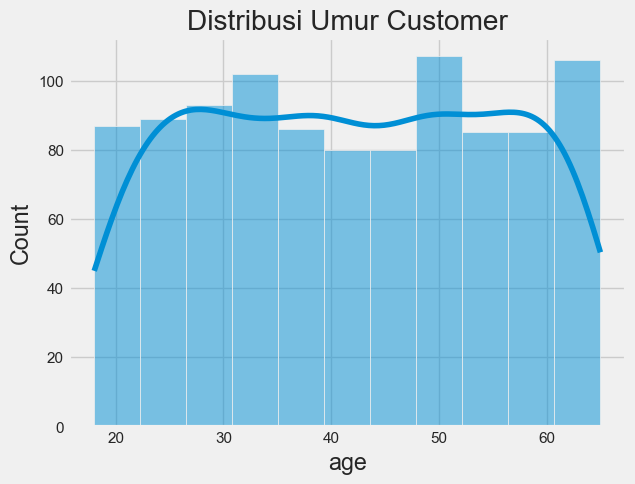

In [19]:
sns.histplot(cust.age, kde=True)
plt.title("Distribusi Umur Customer")

Text(0.5, 1.0, 'Distribusi Pengeluaran Customer')

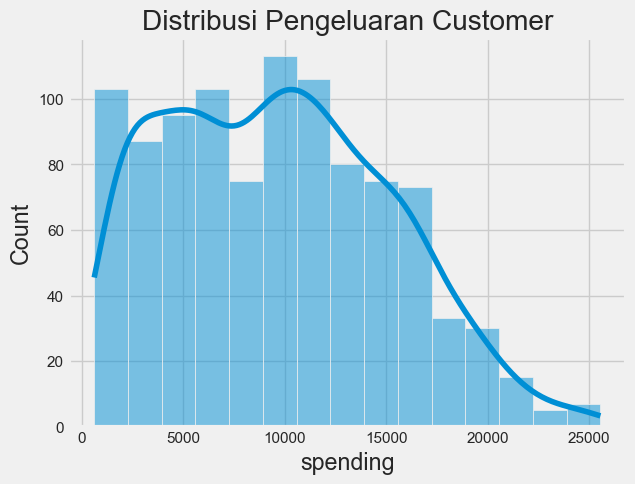

In [20]:
sns.histplot(cust.spending, kde=True)
plt.title("Distribusi Pengeluaran Customer")

Text(0.5, 1.0, 'Distribusi Pendapatan Customer')

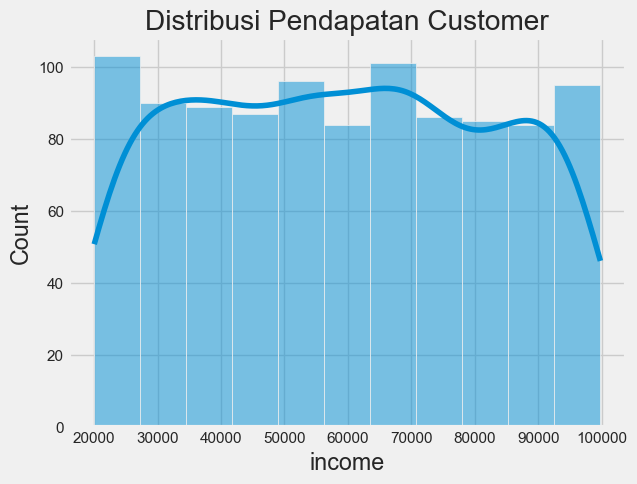

In [21]:
sns.histplot(cust.income, kde=True)
plt.title("Distribusi Pendapatan Customer")

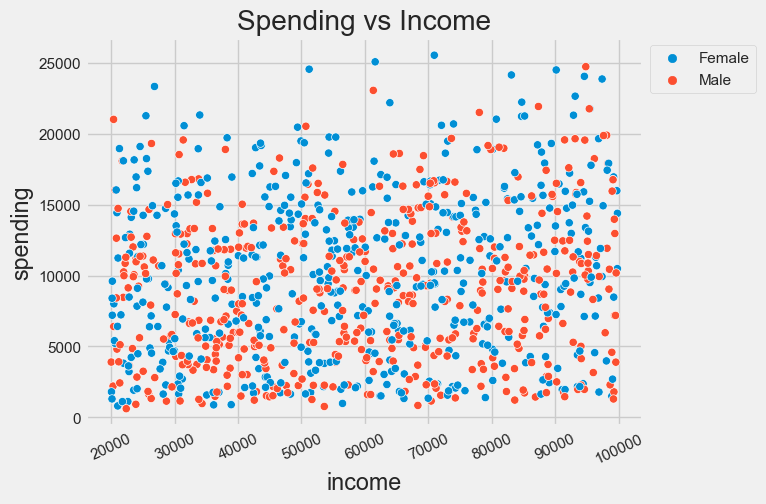

In [22]:
sns.scatterplot(data=cust, x='income', y='spending', hue='gender')

plt.title('Spending vs Income')
plt.xticks(rotation = 25)
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.show()

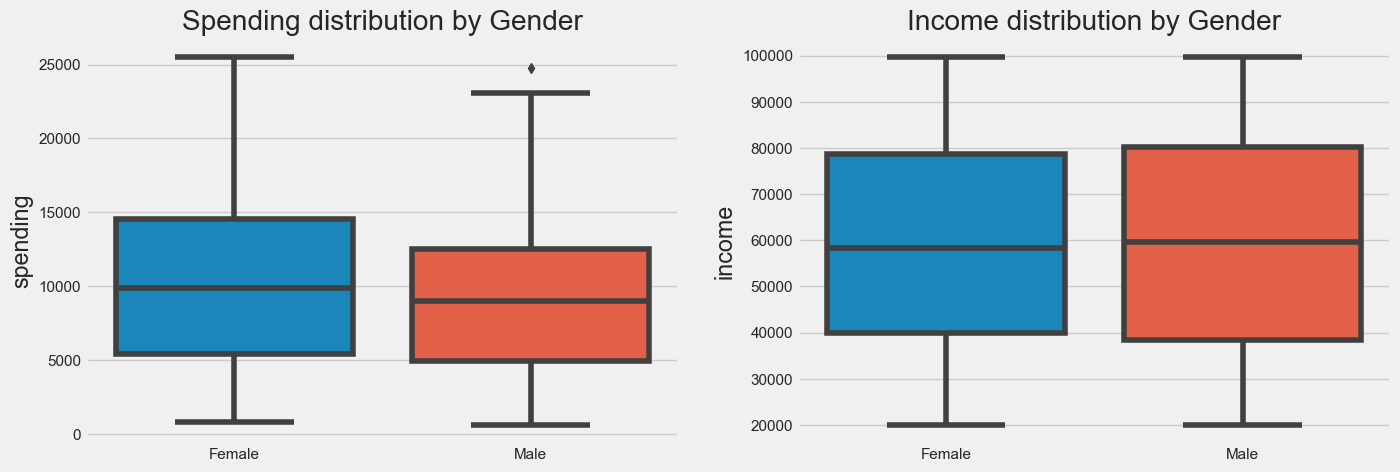

In [23]:
plt.figure(figsize=(15,5))

plt.subplot(1,2,1)
sns.boxplot(x='gender', y='spending', data=cust)
plt.xlabel('')
plt.title('Spending distribution by Gender')

plt.subplot(1,2,2)
sns.boxplot(x='gender', y='income', data=cust)
plt.xlabel('')
plt.title('Income distribution by Gender')
plt.show()

#### Encoding data

In [38]:
cust_copy = cust
cust_copy = pd.get_dummies(cust_copy, columns=['gender'])
cust_copy.drop(['country','education'], axis=1, inplace=True)
cust_copy.head()

,age,income,purchase_frequency,spending,gender_Female,gender_Male
0,42,53936,0.9,13227.120,True,False
1,49,82468,0.6,12674.040,True,False
2,55,56941,0.3,5354.115,False,True
3,24,60651,0.2,2606.510,True,False
4,64,81884,0.9,18984.780,False,True


### Melakukan Normalisasi Data menggunakan MinMaxScaler

In [39]:
from sklearn.preprocessing import MinMaxScaler

cust_copy[cust_copy.columns] = MinMaxScaler().fit_transform(cust_copy)

In [40]:
cust_copy = cust_copy.reset_index(drop=True)
cust_copy.head()

,age,income,purchase_frequency,spending,gender_Female,gender_Male
0,0.510638,0.425146,0.888889,0.505931,1.0,0.0
1,0.659574,0.782919,0.555556,0.483749,1.0,0.0
2,0.787234,0.462827,0.222222,0.190183,0.0,1.0
3,0.127660,0.509348,0.111111,0.079991,1.0,0.0
4,0.978723,0.775596,0.888889,0.736842,0.0,1.0


### K-Medoids

##### Menentukan nilai cluster menggunakan metode elbow

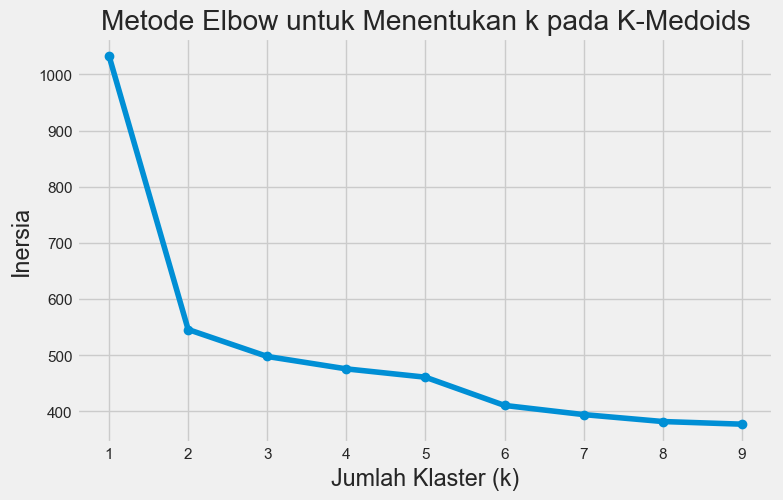

In [28]:
inertias = []
for i in range(1, 10):
    kmedoids = KMedoids(n_clusters=i, random_state=0)
    kmedoids.fit(cust_copy)
    inertias.append(kmedoids.inertia_)

plt.figure(figsize=(8, 5))
plt.plot(range(1, 10), inertias, marker='o')
plt.xlabel('Jumlah Klaster (k)')
plt.ylabel('Inersia')
plt.title('Metode Elbow untuk Menentukan k pada K-Medoids')
plt.show()

##### Didapatkan jumlah klaster = 5

In [29]:
k = 5
kmedoids = KMedoids(n_clusters=k, random_state=0)
clusters = kmedoids.fit_predict(cust_copy)
print(clusters)

[4 4 1 4 3 4 3 0 3 4 0 0 4 2 4 1 4 1 4 4 4 4 4 4 0 1 3 0 1 1 0 3 0 4 3 1 4
 4 3 0 4 4 0 4 4 3 4 4 0 4 0 1 4 4 4 0 4 4 3 0 4 1 4 4 4 4 0 3 2 4 2 4 3 4
 3 3 0 0 0 4 4 3 3 4 0 4 0 3 4 4 1 4 4 0 4 2 2 4 4 3 4 2 4 3 4 3 1 4 4 1 4
 4 4 2 1 3 1 3 0 4 0 1 4 4 1 4 3 0 4 4 4 0 4 4 3 4 3 4 4 0 4 4 0 1 4 3 4 1
 4 4 4 1 4 4 0 0 3 0 3 4 0 4 4 1 3 0 3 4 1 1 4 3 3 4 2 4 4 4 0 4 4 2 3 2 4
 4 4 0 0 4 4 4 4 4 0 2 0 1 4 3 2 4 3 3 0 4 3 1 1 1 4 2 4 4 4 1 1 3 4 4 1 3
 4 4 4 3 0 4 4 4 4 2 4 4 0 4 4 2 4 0 4 0 4 3 2 1 3 3 4 4 4 4 4 4 3 4 3 4 2
 1 3 4 4 4 4 1 4 4 1 4 4 1 2 4 3 4 4 4 4 3 3 4 4 2 2 0 1 3 4 4 0 2 0 2 0 0
 4 1 4 4 4 4 4 4 0 4 4 4 2 4 4 4 3 1 4 4 1 2 4 4 2 4 4 3 3 3 0 4 4 1 4 2 3
 4 4 4 4 4 4 0 0 3 4 4 4 4 0 4 0 0 4 4 4 4 3 4 4 3 3 4 4 4 4 2 4 0 4 4 4 1
 0 4 2 4 4 3 4 2 3 0 4 4 0 2 4 4 4 4 4 0 0 3 4 1 4 2 4 3 4 4 4 0 0 4 0 4 4
 1 4 4 3 2 4 4 2 3 3 4 4 2 4 0 4 4 4 4 4 4 4 4 0 4 0 2 0 4 4 3 0 2 0 3 1 3
 4 1 4 4 1 3 3 4 4 3 4 4 4 4 0 4 2 2 0 0 4 4 1 4 4 2 2 3 2 4 4 4 1 3 3 4 3
 4 4 2 4 4 3 4 2 4 0 4 4 

In [30]:
cust_copy['K-Medoids'] = clusters
cust_copy.head()

,age,income,purchase_frequency,spending,gender_Female,gender_Male,K-Medoids
0,0.510638,0.425146,0.888889,0.505931,1.0,0.0,4
1,0.659574,0.782919,0.555556,0.483749,1.0,0.0,4
2,0.787234,0.462827,0.222222,0.190183,0.0,1.0,1
3,0.127660,0.509348,0.111111,0.079991,1.0,0.0,4
4,0.978723,0.775596,0.888889,0.736842,0.0,1.0,3


### K-Means

##### Menentukan nilai cluster menggunakan metode elbow

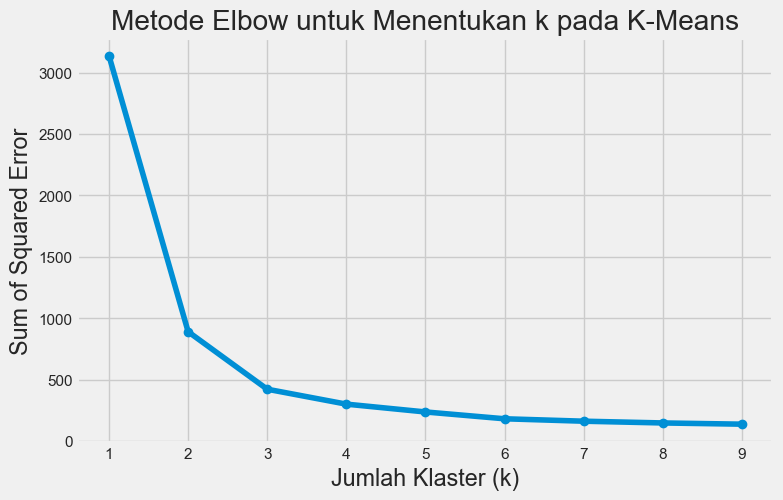

In [31]:
k_range = range(1,10)
sse = []
for k in k_range:
    km = KMeans(n_clusters=k)
    km.fit(cust_copy)
    sse.append(km.inertia_)

plt.figure(figsize=(8, 5))
plt.xlabel('Jumlah Klaster (k)')
plt.ylabel('Sum of Squared Error')
plt.title('Metode Elbow untuk Menentukan k pada K-Means')
plt.plot(k_range,sse, marker='o')

##### Didapatkan jumlah cluster = 3

In [32]:
clusterNum = 3
k_means = KMeans(init = "k-means++", n_clusters = clusterNum, n_init = 12)
k_means.fit(cust_copy)
labels = k_means.labels_
print(labels)

[0 0 1 0 2 0 2 1 2 0 1 1 0 2 0 1 0 1 0 0 0 0 0 0 1 1 2 1 1 1 1 2 1 0 2 1 0
 0 2 1 0 0 1 0 0 2 0 0 1 0 1 1 0 0 0 1 0 0 2 1 0 1 0 0 0 0 1 2 2 0 2 0 2 0
 2 2 1 1 1 0 0 2 2 0 1 0 1 2 0 0 1 0 0 1 0 2 2 0 0 2 0 2 0 2 0 2 1 0 0 1 0
 0 0 2 1 2 1 2 1 0 1 1 0 0 1 0 2 1 0 0 0 1 0 0 2 0 2 0 0 1 0 0 1 1 0 2 0 1
 0 0 0 1 0 0 1 1 2 1 2 0 1 0 0 1 2 1 2 0 1 1 0 2 2 0 2 0 0 0 1 0 0 2 2 2 0
 0 0 1 1 0 0 0 0 0 1 2 1 1 0 2 2 0 2 2 1 0 2 1 1 1 0 2 0 0 0 1 1 2 0 0 1 2
 0 0 0 2 1 0 0 0 0 2 0 0 1 0 0 2 0 1 0 1 0 2 2 1 2 2 0 0 0 0 0 0 2 0 2 0 2
 1 2 0 0 0 0 1 0 0 1 0 0 1 2 0 2 0 0 0 0 2 2 0 0 2 2 1 1 2 0 0 1 2 1 2 1 1
 0 1 0 0 0 0 0 0 1 0 0 0 2 0 0 0 2 1 0 0 1 2 0 0 2 0 0 2 2 2 1 0 0 1 0 2 2
 0 0 0 0 0 0 1 1 2 0 0 0 0 1 0 1 1 0 0 0 0 2 0 0 2 2 0 0 0 0 2 0 1 0 0 0 1
 1 0 2 0 0 2 0 2 2 1 0 0 1 2 0 0 0 0 0 1 1 2 0 1 0 2 0 2 0 0 0 1 1 0 1 0 0
 1 0 0 2 2 0 0 2 2 2 0 0 2 0 1 0 0 0 0 0 0 0 0 1 0 1 2 1 0 0 2 1 2 1 2 1 2
 0 1 0 0 1 2 2 0 0 2 0 0 0 0 1 0 2 2 1 1 0 0 1 0 0 2 2 2 2 0 0 0 1 2 2 0 2
 0 0 2 0 0 2 0 2 0 1 0 0 

In [33]:
cust_copy["K-Means"] = labels
cust_copy.head(5)

,age,income,purchase_frequency,spending,gender_Female,gender_Male,K-Medoids,K-Means
0,0.510638,0.425146,0.888889,0.505931,1.0,0.0,4,0
1,0.659574,0.782919,0.555556,0.483749,1.0,0.0,4,0
2,0.787234,0.462827,0.222222,0.190183,0.0,1.0,1,1
3,0.127660,0.509348,0.111111,0.079991,1.0,0.0,4,0
4,0.978723,0.775596,0.888889,0.736842,0.0,1.0,3,2


### Visualisasi menggunakan scatter plot

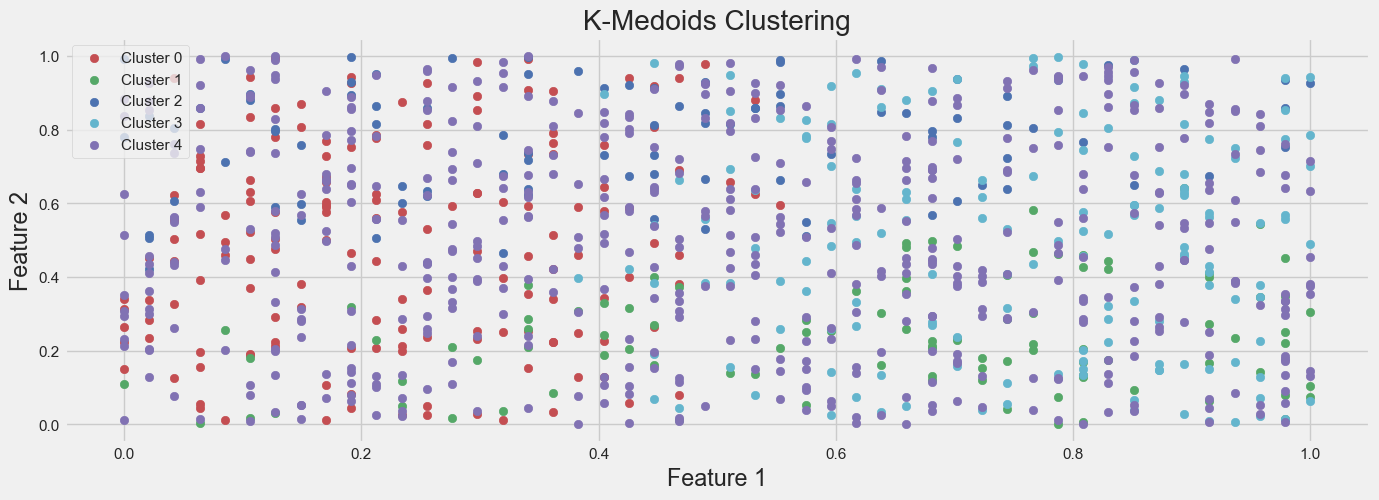

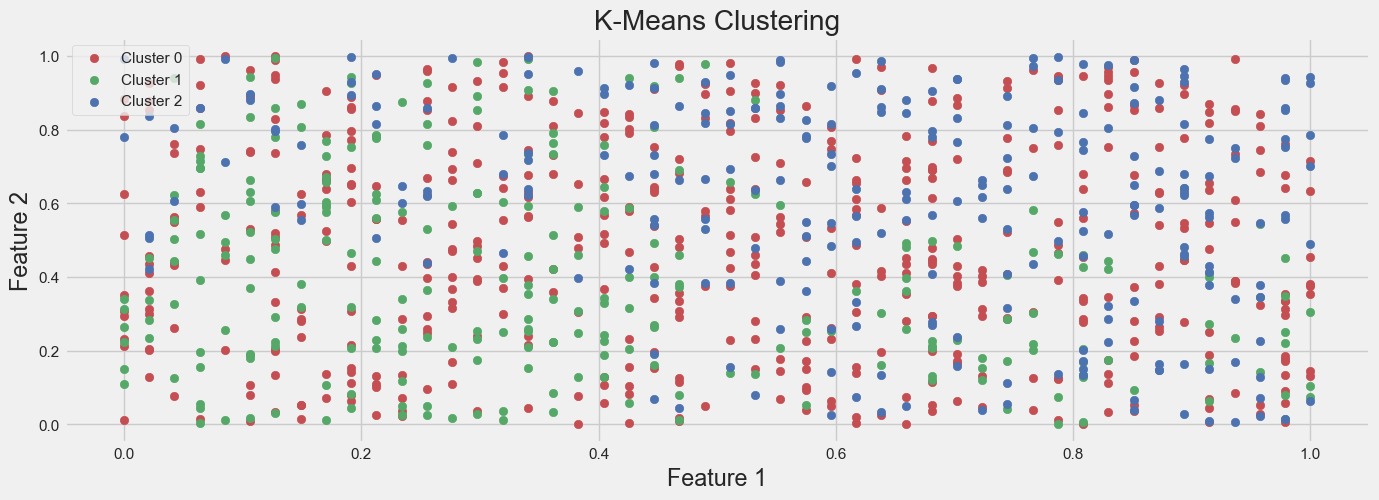

In [34]:
def plot_clusters(data, clusters, title):
    plt.figure(figsize=(15, 5))
    colors = ['r', 'g', 'b', 'c', 'm', 'y', 'k', 'purple', 'orange']
    unique_clusters = np.unique(clusters)
    
    for cluster_id in unique_clusters:
        if isinstance(data, pd.DataFrame):
            cluster_data = data[clusters == cluster_id]
            plt.scatter(cluster_data.iloc[:, 0], cluster_data.iloc[:, 1], 
                        color=colors[cluster_id % len(colors)], label=f'Cluster {cluster_id}')
        else:
            plt.scatter(data[clusters == cluster_id, 0], data[clusters == cluster_id, 1], 
                        color=colors[cluster_id % len(colors)], label=f'Cluster {cluster_id}')
    
    plt.title(title)
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.legend()
    plt.show()
    
# Ensure cust_copy is a numpy array or modify indexing based on the actual type
cust_copy = np.array(cust_copy)  # Convert to numpy array if it's not

# Visualisasi klaster hasil K-Medoids
plot_clusters(cust_copy, clusters, 'K-Medoids Clustering')

# Visualisasi klaster hasil K-Means
plot_clusters(cust_copy, labels, 'K-Means Clustering')

#### Evaluasi K-Medoids dan K-Means menggunakan Silhoutte Score

In [35]:
from sklearn.metrics import silhouette_score

# Hitung Silhouette Score untuk K-medoids
silhouette_kmedoids = silhouette_score(cust_copy, clusters)
print(f"Silhouette Score untuk K-medoids: {silhouette_kmedoids}")

# Hitung Silhouette Score untuk K-means
silhouette_kmeans = silhouette_score(cust_copy, labels)
print(f"Silhouette Score untuk K-means: {silhouette_kmeans}")


Silhouette Score untuk K-medoids: 0.6753118812505097
Silhouette Score untuk K-means: 0.6880564426689733


## Modelling Data Menggunakan K-Means

#### PCA

In [42]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)

principalComponents = pca.fit_transform(cust_copy)

principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2'])

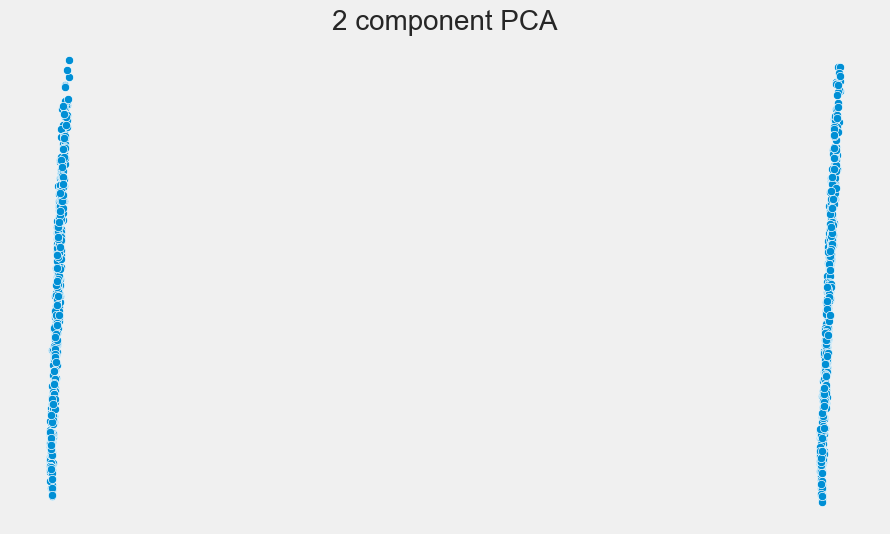

In [43]:
fig, ax = plt.subplots(figsize=(10, 6))

sns.scatterplot(data=principalDf, x='principal component 1', y='principal component 2', ax=ax)

ax.yaxis.set_visible(False)
ax.xaxis.set_visible(False)
ax.spines[:].set_visible(False)
ax.set_xlabel('Principal Component 1', fontsize=15)
ax.set_ylabel('Principal Component 2', fontsize=15)
ax.set_title('2 component PCA', fontsize = 20)
plt.show()

#### Clustering K-Means

In [44]:
model = KMeans(n_clusters=4,random_state=42, n_init='auto')
model.fit(principalComponents)

KMeans(n_clusters=4, n_init='auto', random_state=42)

In [45]:
labels = model.labels_

In [46]:
mapping = {0: 'A', 1: 'B', 2: 'C', 3: 'D'}

labels_mapping = [mapping[val] for val in labels]

In [47]:
cust['Clusters'] = labels_mapping
cust_copy['Clusters'] = labels_mapping
principalDf['Clusters'] = labels_mapping

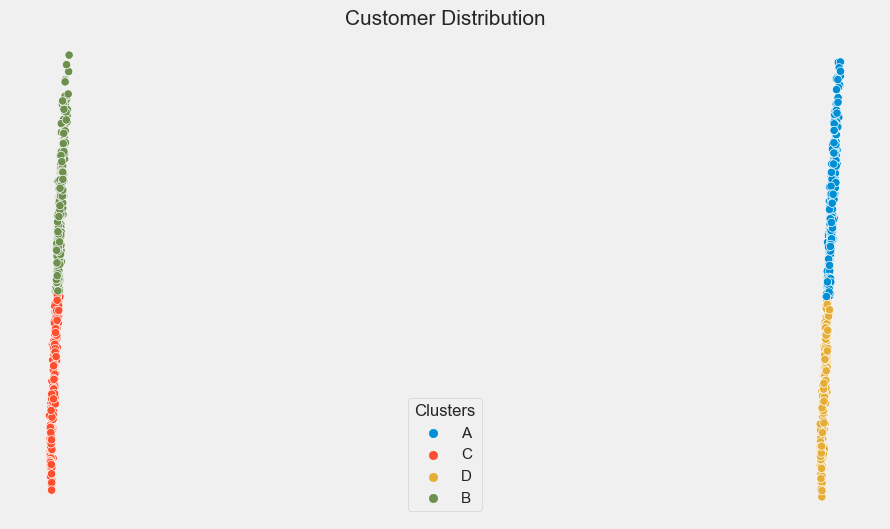

In [48]:
fig, ax = plt.subplots(figsize=(10, 6))

sns.scatterplot(data=principalDf, x='principal component 1', y='principal component 2', hue='Clusters', ax=ax)

ax.set_title('Customer Distribution', fontsize=15)

ax.yaxis.set_visible(False)
ax.xaxis.set_visible(False)
ax.spines[:].set_visible(False)

## Evaluasi Model

#### Cek Elbow dan Silhoutte Model yang dibuat

In [49]:
inertias = []
silhouette_scores = []

for k in range(2, 11):
    model = KMeans(n_clusters=k, random_state=42, n_init='auto')
    model.fit(principalComponents)
    inertias.append(model.inertia_)
    silhouette_scores.append(silhouette_score(principalComponents, model.labels_))

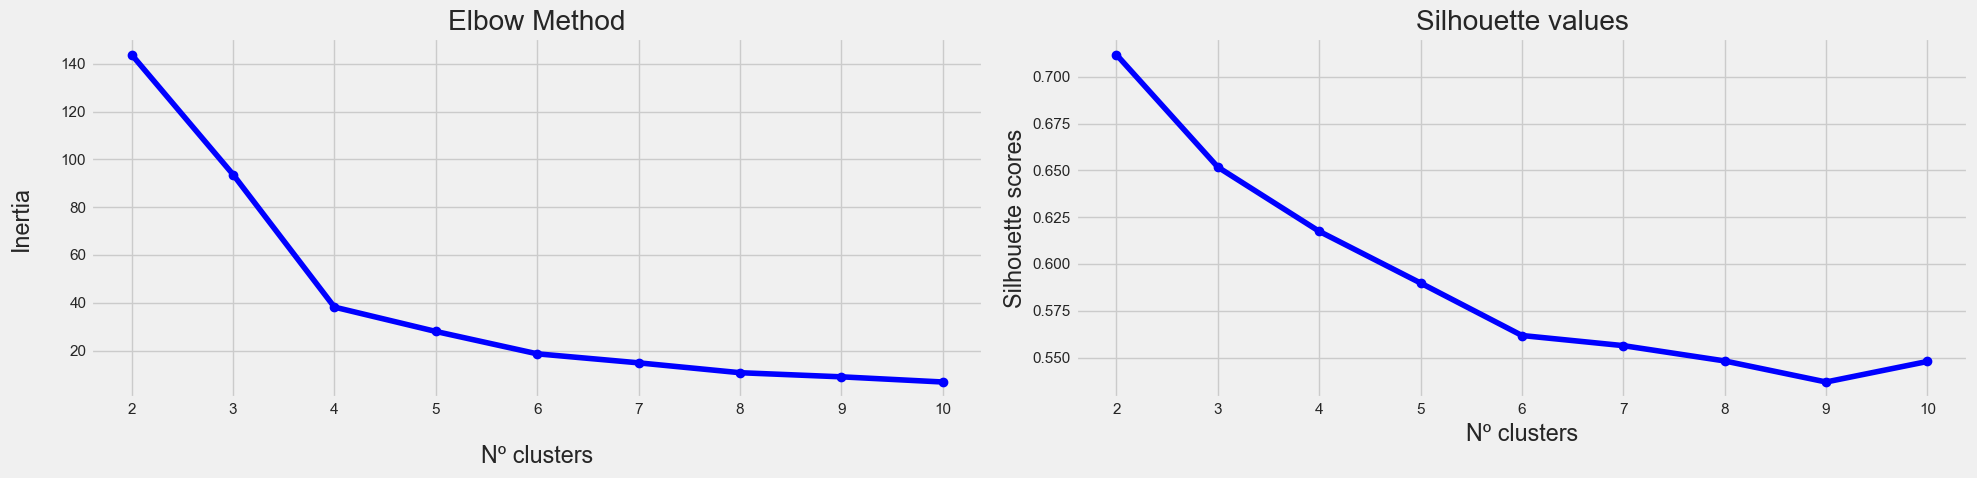

In [50]:
plt.style.use("fivethirtyeight")
fig,ax=plt.subplots(1,2,figsize=(20,5))
ax[0].plot(range(2,11), inertias,color='blue',marker='o',label='Elbow Method')
ax[0].set_xticks(range(2,11))
ax[0].set_xlabel("Nº clusters", labelpad=20)
ax[0].set_ylabel("Inertia", labelpad=20)
ax[0].set_title("Elbow Method")

ax[1].plot(range(2,11), silhouette_scores,color='blue',marker='o',label='Silhouette scores')
ax[1].set_xticks(range(2,11))
ax[1].set_title("Silhouette values")
ax[1].set_xlabel("Nº clusters")
ax[1].set_ylabel("Silhouette scores")
plt.tight_layout();

## Pembahasan Model

#### Segmentation Analysis

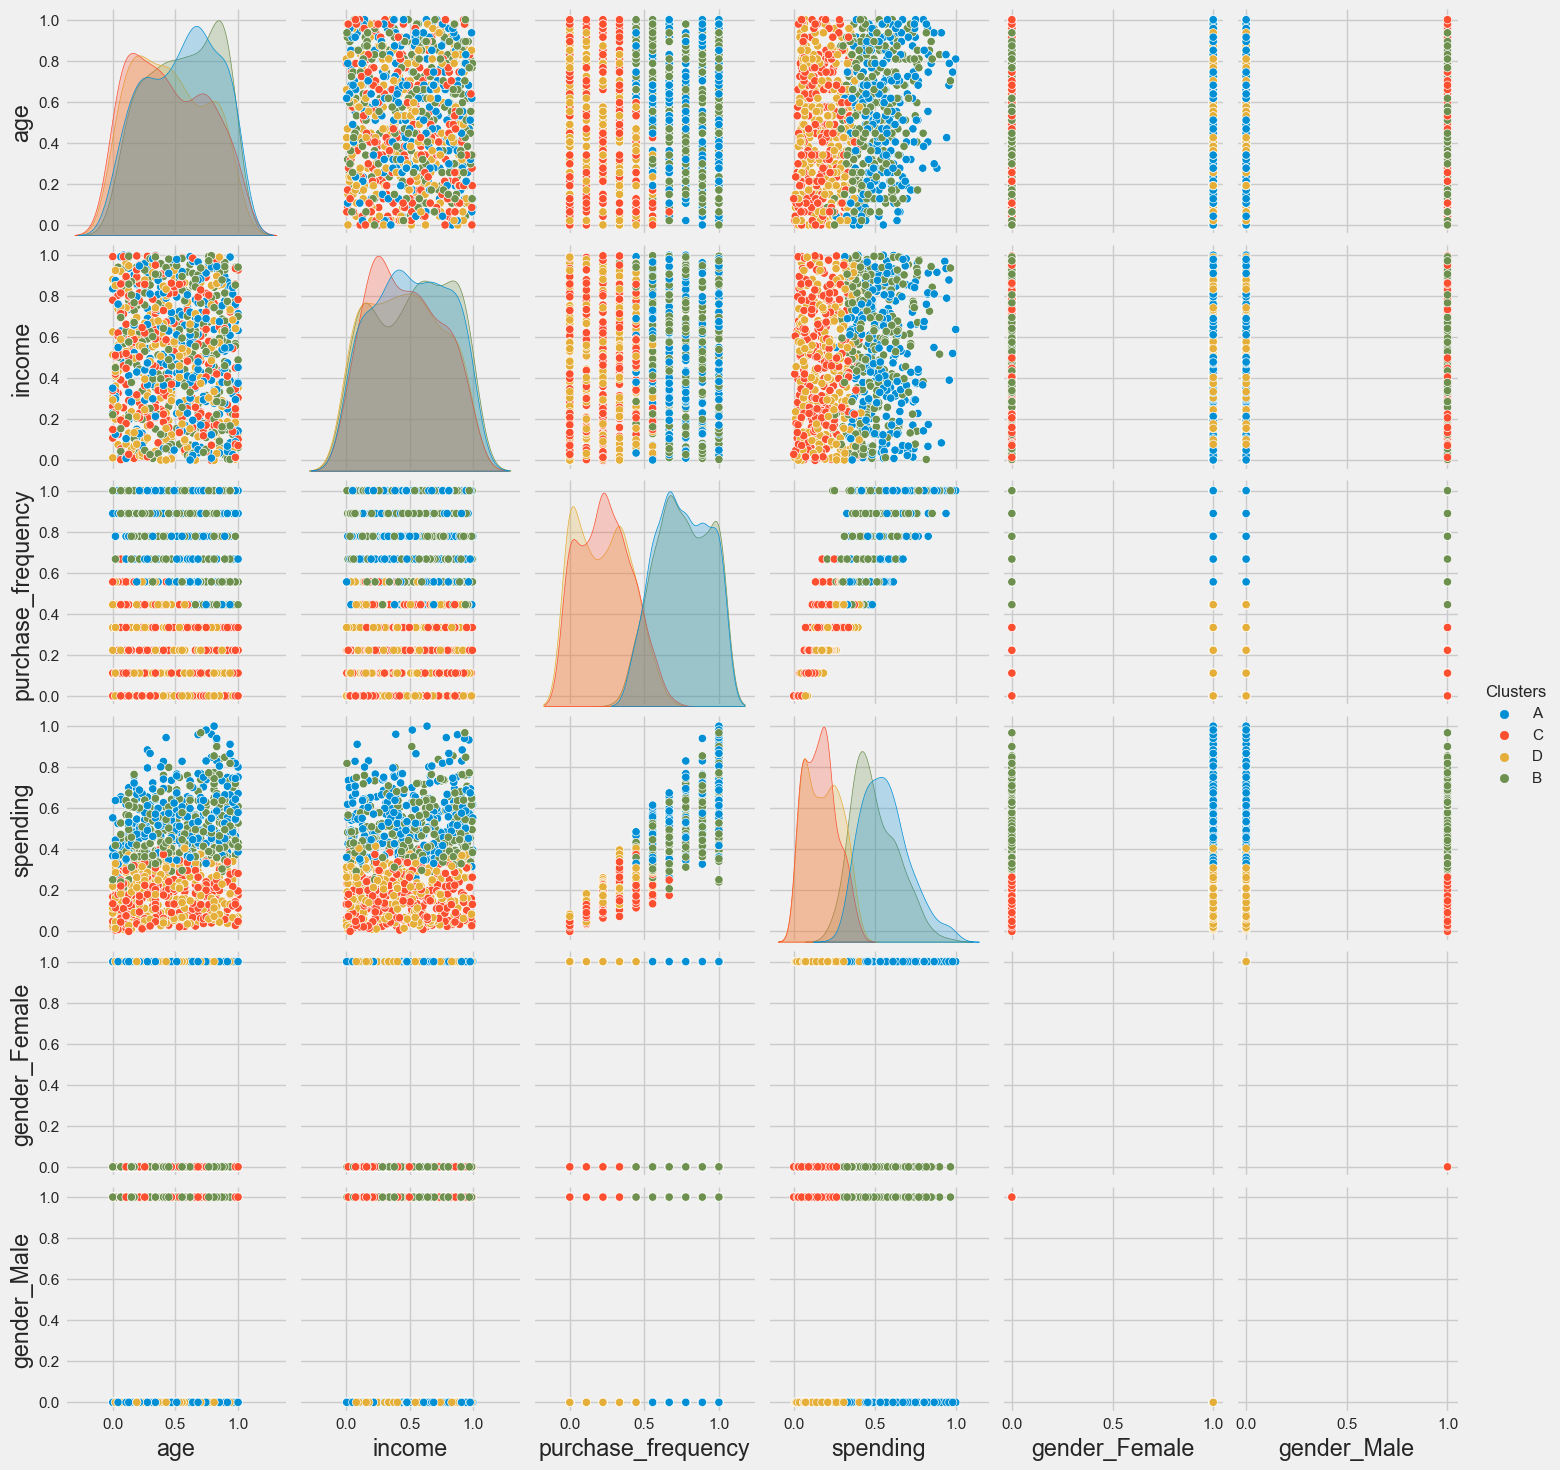

In [51]:
sns.pairplot(cust_copy, hue='Clusters')
plt.show()

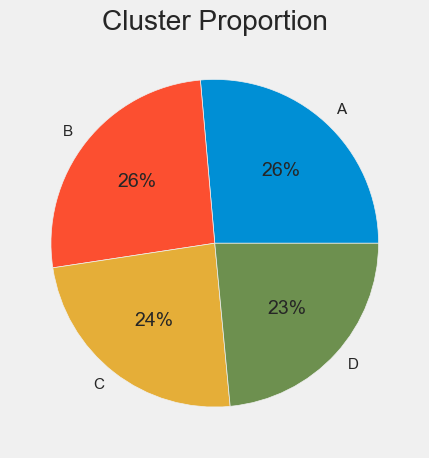

In [52]:
plt.pie(cust['Clusters'].value_counts(),autopct='%1.f%%',labels=['A','B','C','D'])
plt.title('Cluster Proportion')
plt.tight_layout()

In [53]:
cust.groupby('Clusters')['spending'].mean()

Clusters
A    14685.959811
B    13045.364308
C     4730.815871
D     5124.604681
Name: spending, dtype: float64

In [54]:
cust.groupby('Clusters')['income'].mean()

Clusters
A    60976.356061
B    61650.961538
C    57219.639004
D    56854.940426
Name: income, dtype: float64

#### Visualisasi Hasil Model

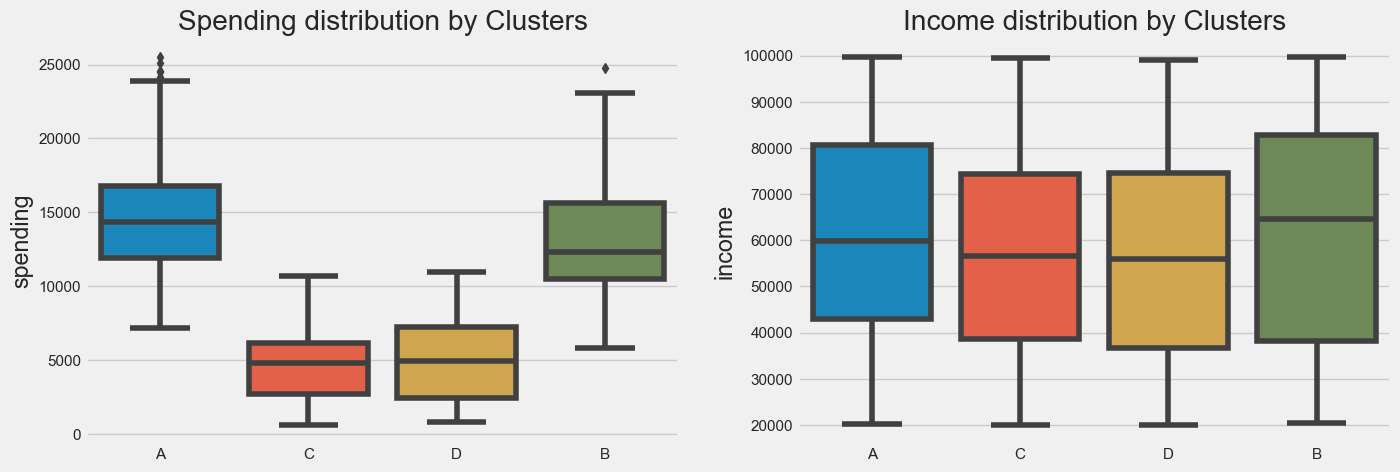

In [55]:
plt.figure(figsize=(15,5))

plt.subplot(1,2,1)
sns.boxplot(x='Clusters', y='spending', data=cust)
plt.xlabel('')
plt.title('Spending distribution by Clusters')

plt.subplot(1,2,2)
sns.boxplot(x='Clusters', y='income', data=cust)
plt.xlabel('')
plt.title('Income distribution by Clusters')
plt.show()

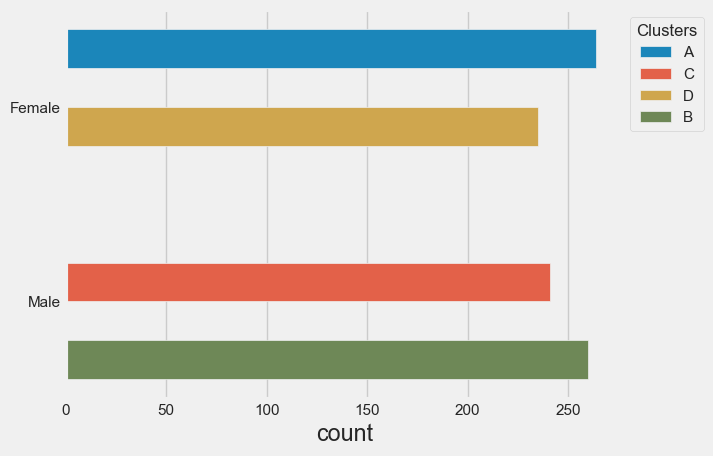

In [56]:
sns.countplot(cust, y='gender', hue='Clusters')
plt.ylabel('')
plt.legend(loc='upper left', bbox_to_anchor=(1, 1), title='Clusters')
plt.show()

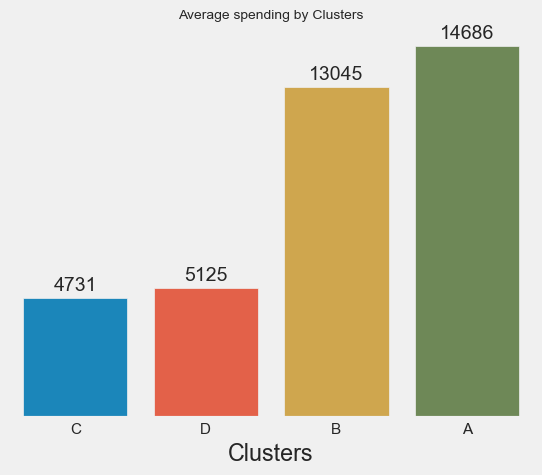

In [57]:
avg = cust.groupby('Clusters')['spending'].mean().to_frame().reset_index().sort_values(by=['spending'], ascending=True)

splot = sns.barplot(data = avg, x='Clusters', y='spending')
plt.tight_layout()
for p in splot.patches:
    splot.annotate(format(p.get_height(), '.0f'),
                  (p.get_x() + p.get_width() / 2, p.get_height()),
                  ha='center', va='center',
                  xytext = (0,9),
                  textcoords = 'offset points')
plt.yticks([])
plt.ylabel('')
plt.xlabel('Clusters')
plt.title('Average spending by Clusters', fontsize=10)
plt.show()

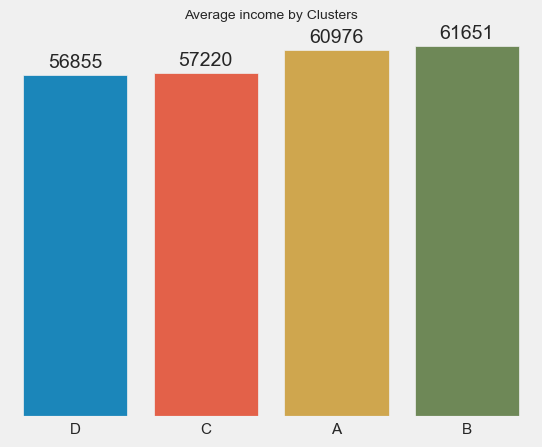

In [58]:
avg = cust.groupby('Clusters')['income'].mean().to_frame().reset_index().sort_values(by=['income'], ascending=True)

splot = sns.barplot(data = avg, x='Clusters', y='income')
plt.tight_layout()
for p in splot.patches:
    splot.annotate(format(p.get_height(), '.0f'),
                  (p.get_x() + p.get_width() / 2, p.get_height()),
                  ha='center', va='center',
                  xytext = (0,9),
                  textcoords = 'offset points')
plt.yticks([])
plt.ylabel('')
plt.xlabel('')
plt.title('Average income by Clusters', fontsize=10)
plt.show()

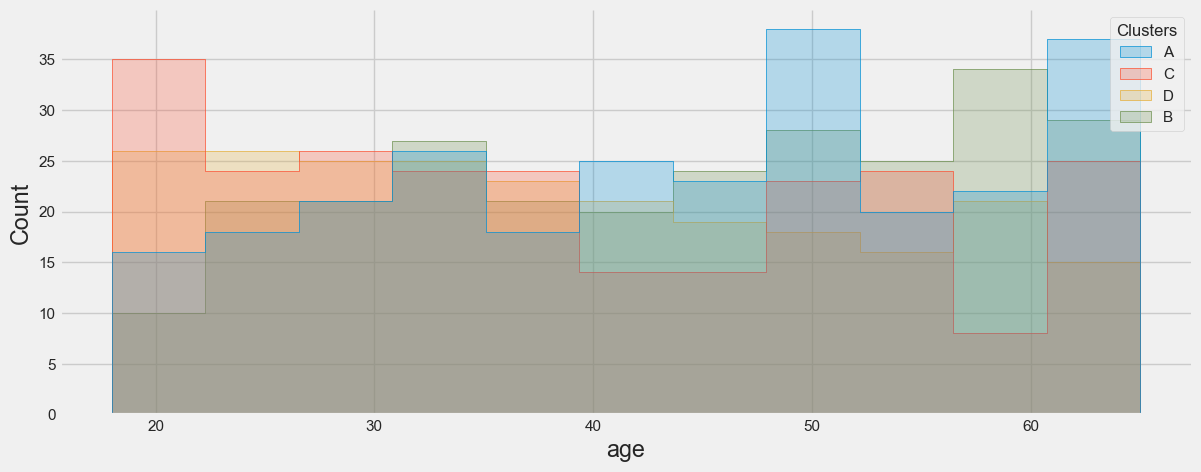

In [59]:
fig, ax = plt.subplots(figsize=(13, 5))

sns.histplot(cust, x="age", hue="Clusters", element="step")
    
ax.spines[['top', 'right']].set_visible(False)

plt.show()

##### Jadi dari hasil ini, bisa dilihat bahwa customer dalam cluster A dan B yang memiliki income tinggi lebih memilih untuk spending lebih banyak daripada customer dalam cluster C dan D yang spendingnya lebih sedikit. Jadi jika perusahaan ingin melakukan promosi atau penjualan lebih, bisa menggunakan data ini untuk mendapatkan penjualan yang lebih lancar dengan promosi kepada customer dalam cluster A dan B yang mana didominasi oleh orang-orang yang banyak melakuakn purchase dan juga spending dibandingkan customer dalam cluster C dan D.